In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import json

import torch
from dataset.loader import DatasetLoader
from tokenizer import ByteLevelBPE

import sys
sys.path.append("..")
import config

import matplotlib.pyplot as plt

import importlib

/home/nad/studies/Transformer-Image-Captioning-IIW/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
batch_size = config.BATCH_SIZE

# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

random.seed(42)

importlib.reload(config)

<module 'config' from '/home/nad/studies/Transformer-Image-Captioning-IIW/config.py'>

In [3]:
data_loader = DatasetLoader(dataset_type=config.DATASET, batch_size_train=1, batch_size_test=1, shuffle_test=True)
data_loader.load_data()

train_dataloader = data_loader.get_train_dataloader()
test_dataloader = data_loader.get_test_dataloader()

Loading COCO dataset...


{'pixel_values': tensor([[[[0.2588, 0.2902, 0.2431,  ..., 0.9804, 0.9804, 0.9725],
          [0.2235, 0.2196, 0.2039,  ..., 0.9882, 0.9843, 0.9843],
          [0.3961, 0.2196, 0.1961,  ..., 0.9843, 0.9882, 0.9882],
          ...,
          [0.0039, 0.0039, 0.0000,  ..., 0.1882, 0.3843, 0.7373],
          [0.0039, 0.0078, 0.0078,  ..., 0.3098, 0.4196, 0.6863],
          [0.4118, 0.1176, 0.0000,  ..., 0.6784, 0.6863, 0.8078]],

         [[0.2588, 0.2902, 0.2431,  ..., 0.9804, 0.9804, 0.9725],
          [0.2235, 0.2196, 0.2039,  ..., 0.9882, 0.9843, 0.9843],
          [0.3961, 0.2196, 0.1961,  ..., 0.9843, 0.9882, 0.9882],
          ...,
          [0.0039, 0.0039, 0.0000,  ..., 0.1882, 0.3843, 0.7373],
          [0.0039, 0.0078, 0.0078,  ..., 0.3098, 0.4196, 0.6863],
          [0.4118, 0.1176, 0.0000,  ..., 0.6784, 0.6863, 0.8078]],

         [[0.2588, 0.2902, 0.2431,  ..., 0.9804, 0.9804, 0.9725],
          [0.2235, 0.2196, 0.2039,  ..., 0.9882, 0.9843, 0.9843],
          [0.3961, 0.2196

/tmp/ipykernel_75583/3186784317.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  plt.imshow(np.array(train_sample['pixel_values'].squeeze().permute(1, 2, 0)))


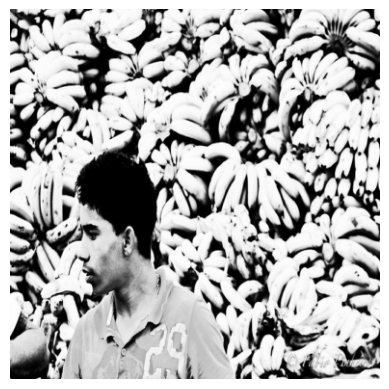

Description:
 ['A man standing in front of a pile of bananas.']


/tmp/ipykernel_75583/3186784317.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  plt.imshow(np.array(test_sample['pixel_values'].squeeze().permute(1, 2, 0)))


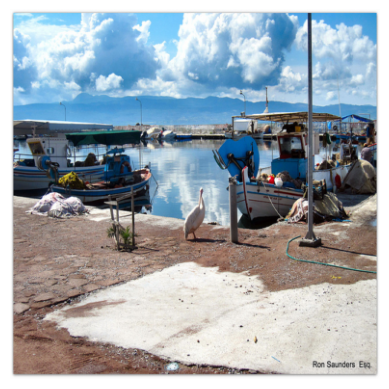

Description:
 ['A large white bird standing next to a large body of water.']


In [4]:
train_sample = next(iter(train_dataloader))
print(train_sample)
plt.imshow(np.array(train_sample['pixel_values'].squeeze().permute(1, 2, 0)))
plt.axis('off')
plt.show()
print('Description:\n', train_sample['description'])

test_sample = next(iter(test_dataloader))
plt.imshow(np.array(test_sample['pixel_values'].squeeze().permute(1, 2, 0)))
plt.axis('off')
plt.show()
print('Description:\n', test_sample['description'])

In [5]:
# max_desc_length = data_loader.get_max_description_length()
max_desc_length = data_loader.get_max_description_length_test()

In [6]:
# export json for setting MAX_DESC_LENGTH=max_desc_length in config later
with open(os.path.join(config.TOKENIZER_DATA_PATH, "max_desc_length_{}.json".format(config.DATASET)), "w") as f:
    json.dump({"MAX_DESC_LENGTH": max_desc_length}, f)

In [7]:
lengths = []
descriptions = []

# for sample in train_dataloader:
#     desc = sample['description'][0]
#     lengths.append(len(desc))
#     descriptions.append(desc)

for sample in test_dataloader:
    desc = sample['description'][0]
    lengths.append(len(desc))
    descriptions.append(desc)

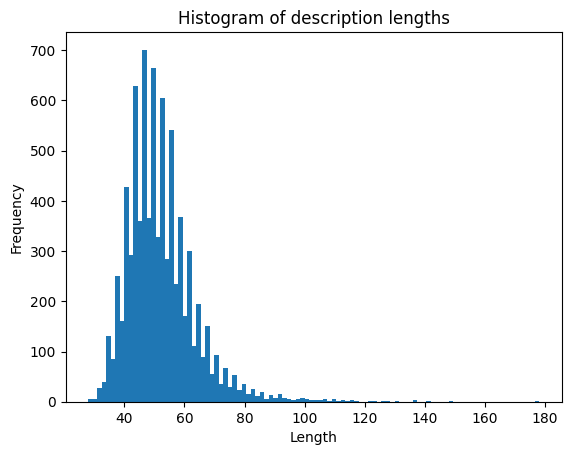

Length mean:  52.04727811381311
Length median:  50.0
Length std:  11.626744984039476
Length max (90th percentile):  66
Length max (92nd percentile):  68
Length max (95th percentile):  72
Length max (99th percentile):  92


In [8]:
plt.hist(lengths, bins=100)
plt.title("Histogram of description lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

mean = np.mean(lengths)
median = np.median(lengths)
std = np.std(lengths)
max_length_90 = int(np.percentile(lengths, 90))
max_length_92 = int(np.percentile(lengths, 92))
max_length_95 = int(np.percentile(lengths, 95))
max_length_99 = int(np.percentile(lengths, 99))
print('Length mean: ', mean)
print('Length median: ', median)
print('Length std: ', std)
print('Length max (90th percentile): ', max_length_90)
print('Length max (92nd percentile): ', max_length_92)
print('Length max (95th percentile): ', max_length_95)
print('Length max (99th percentile): ', max_length_99)

In [9]:
with open(os.path.join(config.TOKENIZER_DATA_PATH, "description_stats_{}.json".format(config.DATASET)), "w") as f:
    json.dump({
        "mean": round(mean),
        "median": round(median),
        "std": round(std),
        "max_90": max_length_90,
        "max_92": max_length_92,
        "max_95": max_length_95,
        "max_99": max_length_99
    }, f)

In [ ]:
special_tokens = [config.SpecialTokens.PAD, config.SpecialTokens.BOS, config.SpecialTokens.EOS]
bpe_tokenizer = ByteLevelBPE(special_tokens=special_tokens)

bpe_tokenizer.train(descriptions, vocab_size=config.TEXT_VOCAB_SIZE, verbose=True)
print(bpe_tokenizer)
bpe_tokenizer.save(folder=config.TOKENIZER_DATA_PATH, filename_prefix=config.TOKENIZER_FILENAME_PREFIX)


Vocab size (with special tokens): 1003
Made 744 merges
ByteLevelBPE(vocab_size=1003)


In [ ]:
bpe_tokenizer.load(folder=config.TOKENIZER_DATA_PATH, filename_prefix=config.TOKENIZER_FILENAME_PREFIX)

samples = 10
max_seq_length = max_desc_length + 2  # +2 for BOS and EOS tokens

for batch in train_dataloader:
    if samples < 0:
        break
    desc_batch = batch['description']
    for desc in desc_batch:
        print('Description: ', desc)
        print('Tokenized: ', bpe_tokenizer.tokenize(desc))
        encoded = bpe_tokenizer.encode(desc, max_seq_length=max_seq_length, verbose=True)
        print(f'Encoded: {encoded}')
        decoded = bpe_tokenizer.decode(encoded)
        print(f'Decoded: {decoded}\n')
        decoded_stripped = bpe_tokenizer.strip(decoded)
        # cut desc to be the same length as decoded_stripped
        desc_cut = desc[:len(decoded_stripped)]
        assert desc_cut == decoded_stripped, "Decoded text does not match original!"
    samples -= 1

Description:  Two birds are standing in the water together.
Tokenized:  ['Two', 'Ġbird', 's', 'Ġa', 're', 'Ġstanding', 'Ġin', 'Ġthe', 'Ġwater', 'Ġto', 'g', 'et', 'h', 'er', '.']
Encoded: [1, 379, 559, 118, 259, 274, 336, 280, 283, 463, 285, 106, 304, 107, 268, 49, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Decoded: <bos>Two birds are standing in the water together.<eos><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad

In [12]:
# test all train and test samples
for batch in train_dataloader:
    desc_batch = batch['description']
    for desc in desc_batch:
        encoded = bpe_tokenizer.encode(desc, max_seq_length=max_seq_length, verbose=False)
        decoded = bpe_tokenizer.decode(encoded)
        decoded_stripped = bpe_tokenizer.strip(decoded)
        desc_cut = desc[:len(decoded_stripped)]
        assert desc_cut == decoded_stripped, "Decoded (train) text does not match original!\nEncoded: {}\nDecoded: {}\nOriginal: {}".format(encoded, decoded, desc_cut)
for batch in test_dataloader:
    desc_batch = batch['description']
    for desc in desc_batch:
        encoded = bpe_tokenizer.encode(desc, max_seq_length=max_seq_length, verbose=False)
        decoded = bpe_tokenizer.decode(encoded)
        decoded_stripped = bpe_tokenizer.strip(decoded)
        desc_cut = desc[:len(decoded_stripped)]
        assert desc_cut == decoded_stripped, "Decoded (test) text does not match original!\nEncoded: {}\nDecoded: {}\nOriginal: {}".format(encoded, decoded, desc_cut)